In [1]:
import matplotlib.pyplot as plt 
import torch 
import numpy as np
import torch.nn as nn 
import torch.optim as optim 
import torch.distributions as distributions 
import torch.nn.functional as F

In [2]:
# Define the plot function
def plot(xs, ys, xlim=(-3,3), ylim=(-3,3)):
    fig, ax = plt.subplots()
    ax.plot(xs, ys,  linewidth=5)
    ax.grid(True, which='both')

    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)

# 一个简单的全连接神经网络，模拟 sin 和 cos 函数

In [3]:
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.net = nn.Sequential()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [4]:
net = Net(input_size=1, output_size=1)

In [5]:
print(net)

Net(
  (net): Sequential()
  (fc1): Linear(in_features=1, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)


torch.Size([100, 1])


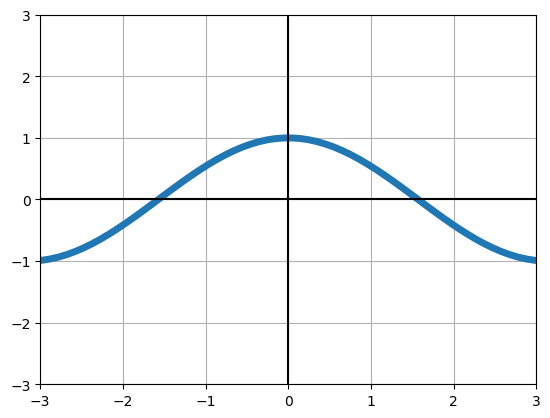

In [6]:
x = torch.linspace(-5, 5, 100).view(100, 1) 
print(x.shape) 
y_target = torch.cos(x) 
loss_fn = nn.MSELoss() 
plot(x, y_target)

In [7]:
y = net(x)
print(y.shape)

torch.Size([100, 1])


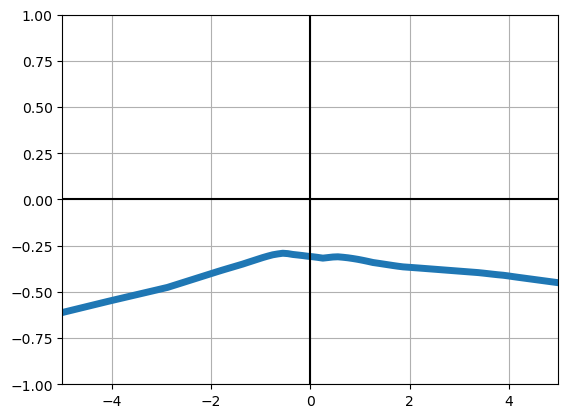

In [8]:
plot(x.detach().numpy(), y.detach().numpy(), ylim=(-1, 1), xlim=(-5, 5))

In [9]:
# Training
loss = ((y - y_target)**2).sum()
loss.backward()

In [10]:
for p in net.parameters():
    p.data.add_(-0.001 * p.grad)
    p.grad.data.zero_()


In [11]:
for _ in range(1000):
    y = net(x)
    loss = ((y - y_target)**2).sum()
    loss.backward()
    for p in net.parameters():
        p.data.add_(-0.001 * p.grad)
        p.grad.data.zero_()

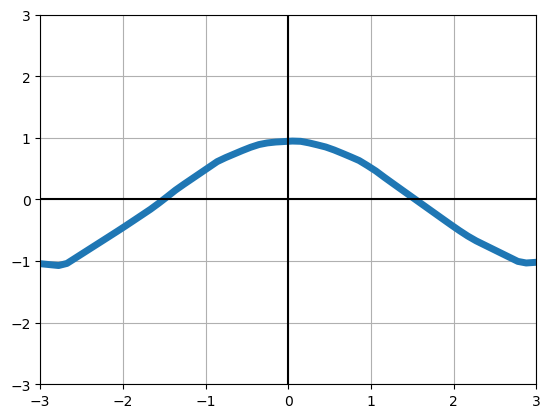

In [12]:
plot(x.detach().numpy(), y.detach().numpy())

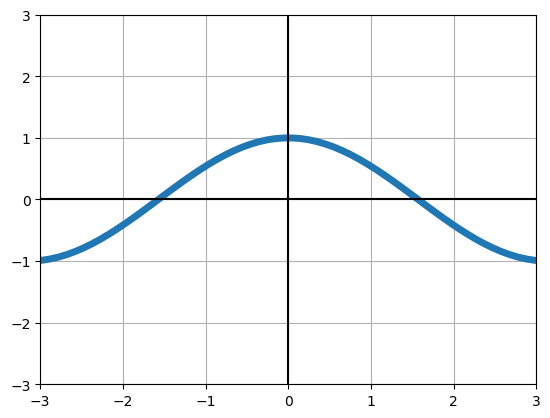

In [13]:
plot(x, y_target)

In [14]:
loss_fn = nn.MSELoss()